## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


Estimated Mean: 5.027152443622421
Estimated Variance: 9.028667318774586


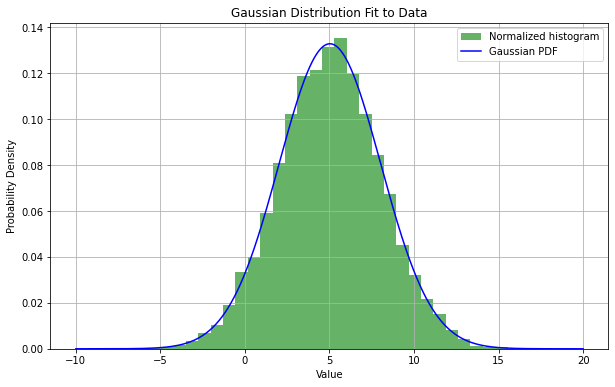

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = np.load('clean_data.npy')

# Convert the data into a 1D array
data_1d = data.flatten()

# Estimate the mean and variance using MLE for the data
mean_est_1d = np.mean(data_1d)
variance_est_1d = np.var(data_1d)

print(f"Estimated Mean: {mean_est_1d}")
print(f"Estimated Variance: {variance_est_1d}")

x_values = np.linspace(-10, 20, 1000)

pdf_values_1d = norm.pdf(x_values, mean_est_1d, np.sqrt(variance_est_1d))

plt.figure(figsize=(10, 6))
plt.hist(data_1d, bins=30, density=True, alpha=0.6, color='g', label='Normalized histogram')
plt.plot(x_values, pdf_values_1d, label='Gaussian PDF', color='blue')
plt.title('Gaussian Distribution Fit to Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

The red curve represents the Gaussian distribution fitted to the corrupted dat  while the blue curve represents the Gaussian distribution fitted to the original data.

The mean has increased from 5.03 in the original data to 6.61 in the corrupted data because the extreme values of the outliners affected the value of the mean. Moreover, the variance has significantly increased from 9.03 in the original data to 33.61 in the corrupted data. A higher variance signifies greater spread in the data because of the presence of the outliers.
Outliers can disproportionately impact parameters like mean and variance especially in a Gaussian model, which assumes that all data points are drawn from the same normal distribution.
It shows how sensitive mean and variance estimations are to outliers in data when using maximum likelihood estimation with a Gaussian distribution.



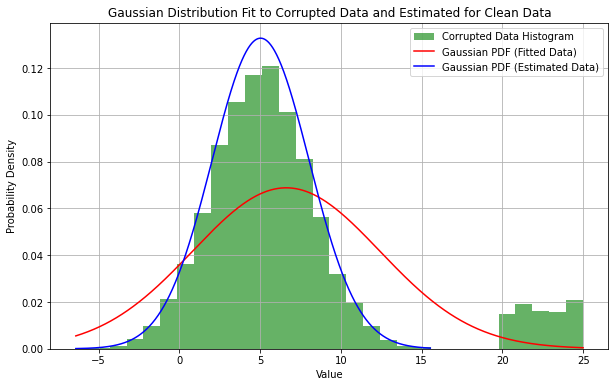

Corrupted Data: Mean = 6.614508398212064 , Variance = 33.61185712302579


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

corrupted_data = np.load('corrupted_data.npy') 
corrupted_data_1d = corrupted_data.flatten()

# Estimate the mean and variance for the corrupted data
mean_est_corrupted = np.mean(corrupted_data_1d)
variance_est_corrupted = np.var(corrupted_data_1d)
x_values_corrupted = np.linspace(corrupted_data_1d.min(), corrupted_data_1d.max(), 1000)
pdf_values_corrupted = norm.pdf(x_values_corrupted, mean_est_corrupted, np.sqrt(variance_est_corrupted))

clean_data = np.load('clean_data.npy') 
clean_data_1d = clean_data.flatten()

# Estimate the mean and variance for the clean data
mean_est_clean = np.mean(clean_data_1d)
variance_est_clean = np.var(clean_data_1d)
x_values_clean = np.linspace(clean_data_1d.min(), clean_data_1d.max(), 1000)
pdf_values_clean = norm.pdf(x_values_clean, mean_est_clean, np.sqrt(variance_est_clean))

plt.figure(figsize=(10, 6))
plt.hist(corrupted_data_1d, bins=30, density=True, alpha=0.6, color='g', label='Corrupted Data Histogram')
plt.plot(x_values_corrupted, pdf_values_corrupted, label='Gaussian PDF (Fitted Data)', color='red')
plt.plot(x_values_clean, pdf_values_clean, label='Gaussian PDF (Estimated Data)', color='blue')
plt.title('Gaussian Distribution Fit to Corrupted Data and Estimated for Clean Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
print("Corrupted Data: Mean =", mean_est_corrupted, ", Variance =", variance_est_corrupted)




1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

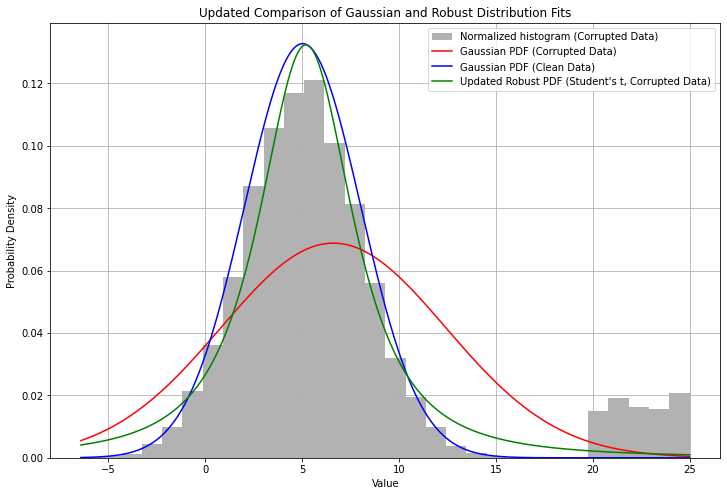

Degrees of Freedom (df): 1.8562102776060034
Robust Mean Estimate: 5.19913884945735
Robust Variance Estimate: 7.008498048801613


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

corrupted_data = np.load('corrupted_data.npy')  
corrupted_data_1d = corrupted_data.flatten()
clean_data = np.load('clean_data.npy')  
clean_data_1d = clean_data.flatten()

mean_est_corrupted = np.mean(corrupted_data_1d)
variance_est_corrupted = np.var(corrupted_data_1d)
x_values = np.linspace(corrupted_data_1d.min(), corrupted_data_1d.max(), 1000)
pdf_gaussian_corrupted = norm.pdf(x_values, mean_est_corrupted, np.sqrt(variance_est_corrupted))

mean_est_clean = np.mean(clean_data_1d)
variance_est_clean = np.var(clean_data_1d)
pdf_gaussian_clean = norm.pdf(x_values, mean_est_clean, np.sqrt(variance_est_clean))

# Estimate the parameters of a Student's t-distribution for the corrupted data
params = t.fit(corrupted_data_1d)
df_est, loc_est, scale_est = params
mean_est_robust = loc_est
var_est_robust = scale_est**2
pdf_robust_estimated = t.pdf(x_values, df_est, loc_est, scale_est)

plt.figure(figsize=(12, 8))
plt.hist(corrupted_data_1d, bins=30, density=True, alpha=0.6, color='gray', label='Normalized histogram (Corrupted Data)')
plt.plot(x_values, pdf_gaussian_corrupted, label='Gaussian PDF (Corrupted Data)', color='red')
plt.plot(x_values, pdf_gaussian_clean, label='Gaussian PDF (Clean Data)', color='blue')
plt.plot(x_values, pdf_robust_estimated, label="Updated Robust PDF (Student's t, Corrupted Data)", color='green')
plt.title('Updated Comparison of Gaussian and Robust Distribution Fits')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

print("Degrees of Freedom (df):", df_est)
print("Robust Mean Estimate:", mean_est_robust)
print("Robust Variance Estimate:", var_est_robust)


The plot visually compares the probability density functions (PDFs) of the Gaussian distributions fitted using the MLE and robust methods to the corrupted data. TThe robust mean for the corrputed data decreased from 6.61 to 5.20 and the variance estimates for the corrupted data 33.1 to 7.01. They are closer to those of the clean data compared to the estimates obtained using a Gaussian fit. Therefore, the robust method was effective for reducing the influence of outliers. 

By fitting a t-distribution to the corrupted data, the analysis becomes less sensitive to the outliers. The mean and variance are more representative of the central trend in the data.
The Student's t-distribution has heavier tails compared to the Gaussian distribution. It can accommodate outliers or extreme values in the data more effectively because it does not penalise the extreme values as heavily as a Gaussian distribution. It is a more accurate representation of the central tendency and variability even if the data is corrupted.
The Student's t-distribution also has a higher flexibility with degree freedom. The degrees of freedom parameter in the t-distribution controls the heaviness of the tails. A lower df shows a  heavier tais which makes the distribution more robust against outliers. When the df increases, the t-distribution approaches a normal distribution and more suitable for data without significant outliers.



# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size $(N\times3)$ that has been reshaped into a vector of size $(N*3 \times 1)$. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the singular values associated with each of the eigenvectors.

**(5 marks)**

Eigenvectors (Principal Components):
[[-0.00414566 -0.05745348 -0.03575944 ...  0.03766391 -0.03702778
   0.03551193]
 [-0.01415521  0.05170179 -0.05249314 ...  0.01730633 -0.01251884
  -0.0314125 ]
 [-0.00842118 -0.0534549  -0.01210248 ...  0.0025899   0.04529307
  -0.0158867 ]
 ...
 [-0.04165744 -0.00579183 -0.00943094 ... -0.04892858 -0.04934674
   0.0127764 ]
 [ 0.00589806 -0.04622668  0.03162122 ... -0.07489539  0.00635546
  -0.11313105]
 [ 0.43018445 -0.20969258  0.08542849 ...  0.00414431  0.00076604
  -0.03810645]]

Coordinates of the shapes in the new coordinate space:
[[ 8.6586792e-03 -8.0314483e-03  5.7005854e-03 -5.2032797e-03
   1.1508698e-02 -1.5120192e-03  2.3850589e-08]
 [-4.7810238e-02 -2.4940839e-02 -2.0356213e-03 -6.2194834e-03
  -4.2278469e-03 -2.5528492e-03 -7.2759576e-11]
 [-3.5227269e-02  1.5263870e-02  8.1075858e-03  1.8354312e-02
   8.4502972e-04  5.0941436e-04  7.7416189e-09]
 [-3.4824405e-03  3.3901386e-02 -1.2260934e-02 -9.4866510e-03
  -8.2463748e-04 -1.784

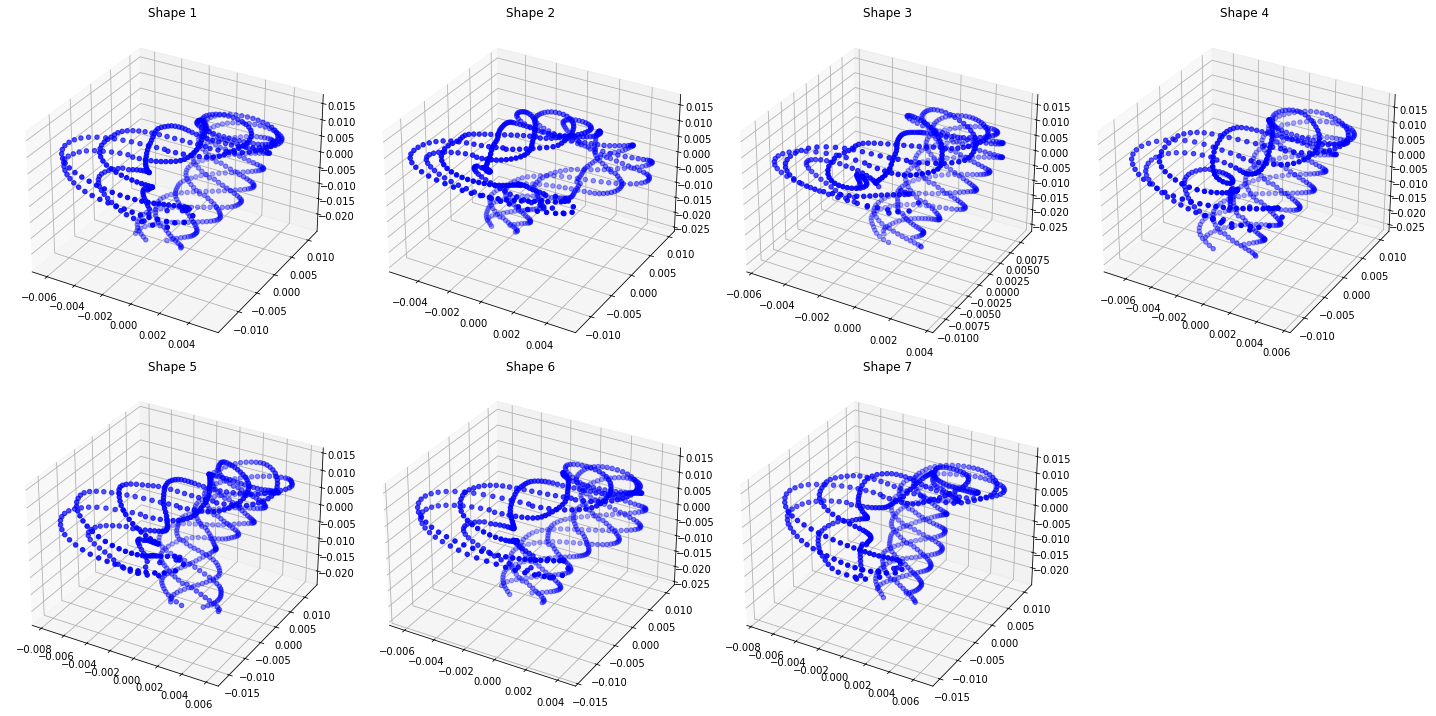

In [4]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

shape_array = np.load('shape_array.npy')

# Perform PCA on the data
pca = PCA()
pca.fit(shape_array.T) 

# Extract principal components (eigenvectors), coordinates, and singular values
eigenvectors = pca.components_
coordinates = pca.transform(shape_array.T)
singular_values = pca.singular_values_

print("Eigenvectors (Principal Components):")
print(eigenvectors)
print("\nCoordinates of the shapes in the new coordinate space:")
print(coordinates)
print("\nSingular values associated with each eigenvector:")
print(singular_values)

fig = plt.figure(figsize=(20, 10))

for i in range(7):  
    ax = fig.add_subplot(2, 4, i+1, projection='3d')
    shape = shape_array[:, i].reshape(-1, 3)  
    ax.scatter(shape[:, 0], shape[:, 1], shape[:, 2], color='b') 
    ax.set_title(f'Shape {i+1}')

plt.tight_layout()
plt.show()


2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the singular values estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
shape_array = np.load('shape_array.npy')

pca = PCA()
pca.fit(shape_array.T) 

# Eigendecomposition of the covariance matrix
covariance_matrix = np.cov(shape_array.T, rowvar=False)
eigenvalues, eigenvectors_cov = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order of eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors_cov[:, sorted_indices]

# New coordinates of each shape in the new coordinate space
new_coordinates = np.dot(shape_array.T, sorted_eigenvectors)

# Comparison between squared singular values from PCA and eigenvalues from eigendecomposition
# Note: Singular values need to be squared to be comparable with eigenvalues
squared_singular_values = pca.singular_values_ ** 2

print("Squared Singular Values from PCA:")
print(squared_singular_values)
print("\nEigenvalues from Eigendecomposition:")
print(sorted_eigenvalues)

print("\nNew Coordinates of each shape in the new coordinate space:")
print(new_coordinates)


Squared Singular Values from PCA:
[6.8393834e-03 2.2997896e-03 8.6354732e-04 6.8661227e-04 1.8722261e-04
 6.7999019e-05 2.5602788e-15]

Eigenvalues from Eigendecomposition:
[ 1.13989731e-03+0.00000000e+00j  3.83298016e-04+0.00000000e+00j
  1.43924451e-04+0.00000000e+00j ... -7.65607619e-20-1.09587750e-20j
 -8.89525478e-20+5.35952525e-20j -8.89525478e-20-5.35952525e-20j]

New Coordinates of each shape in the new coordinate space:
[[ 0.01176365+0.j          0.00225932+0.j         -0.01086235+0.j
  ... -0.00400074+0.00645251j  0.00635973-0.00146951j
   0.00635973+0.00146951j]
 [-0.04470524+0.j          0.01916876+0.j         -0.00312613+0.j
  ... -0.00400074+0.00645251j  0.00635973-0.00146951j
   0.00635973+0.00146951j]
 [-0.03212229+0.j         -0.02103596+0.j         -0.01326935+0.j
  ... -0.00400074+0.00645251j  0.00635973-0.00146951j
   0.00635973+0.00146951j]
 ...
 [ 0.0517537 +0.j          0.0063297 +0.j          0.00512917+0.j
  ... -0.00400074+0.00645251j  0.00635973-0.00146951j
 

1. The squared singular values from PCA and the eigenvalues from the Eigendecomposition are different in magnitude because of the methods used to compute them. PCA in scikit-learn uses Singular Value Decomposition which produces different numerical results compared to direct Eigendecomposition of the covariance matrix especially when dealing with floating-point arithmetic.

2. Eigenvalues from Eigendecomposition include complex numbers while PCA does not. The complex numbers appeared in eigenvalues because of the numerical instabilities in the computation of eigenvalues, especially for covariance matrices that are close to singular or have very small eigenvalues.

3. In PCA produces non-zero singular values is related to the rank of the matrix while Eigendecomposition produces a complete set of eigenvalues with negative values related to the numerical issues. 


2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

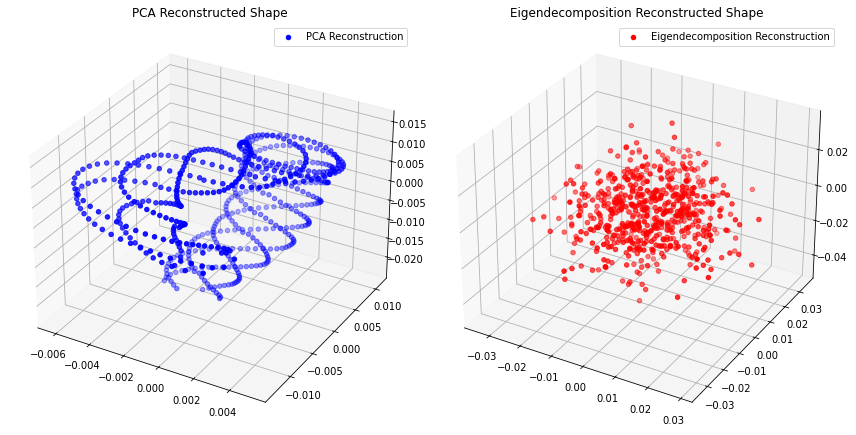

In [6]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

shape_array = np.load('shape_array.npy')

pca = PCA()
pca.fit(shape_array.T) 

coordinates = pca.transform(shape_array.T)
covariance_matrix = np.cov(shape_array.T, rowvar=False)
eigenvalues, eigenvectors_cov = np.linalg.eig(covariance_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors_cov[:, sorted_indices]

new_coordinates = np.dot(shape_array.T, sorted_eigenvectors)

pca_reconstructed = pca.inverse_transform(coordinates[0]).reshape(-1, 3).real
eig_reconstructed = np.dot(new_coordinates[0].real, sorted_eigenvectors.T).reshape(-1, 3).real

fig = plt.figure(figsize=(12, 6))

# PCA shape
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(pca_reconstructed[:, 0], pca_reconstructed[:, 1], pca_reconstructed[:, 2], color='b', label='PCA Reconstruction')
ax1.set_title('PCA Reconstructed Shape')
ax1.legend()

# Eigendecomposition shape
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(eig_reconstructed[:, 0], eig_reconstructed[:, 1], eig_reconstructed[:, 2], color='r', label='Eigendecomposition Reconstruction')
ax2.set_title('Eigendecomposition Reconstructed Shape')
ax2.legend()

plt.tight_layout()
plt.show()


The shapes share similar size and location. The centroids of both reconstructions are at or close the origin, showing that the mean-centering feature of PCA is preserved in the eigendecomposition as well.

 PCA is often described as an approach for dimensionality reduction/data compression because it identifies the significant basis vectors that capture the majority of the data's variance. This allows a lower-dimensional representation of the data to be used without substantial loss of information. Therefore, PCA is better for storage and computation and improves the performance of machine learning algorithms by removing noise and reducing overfitting.

# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

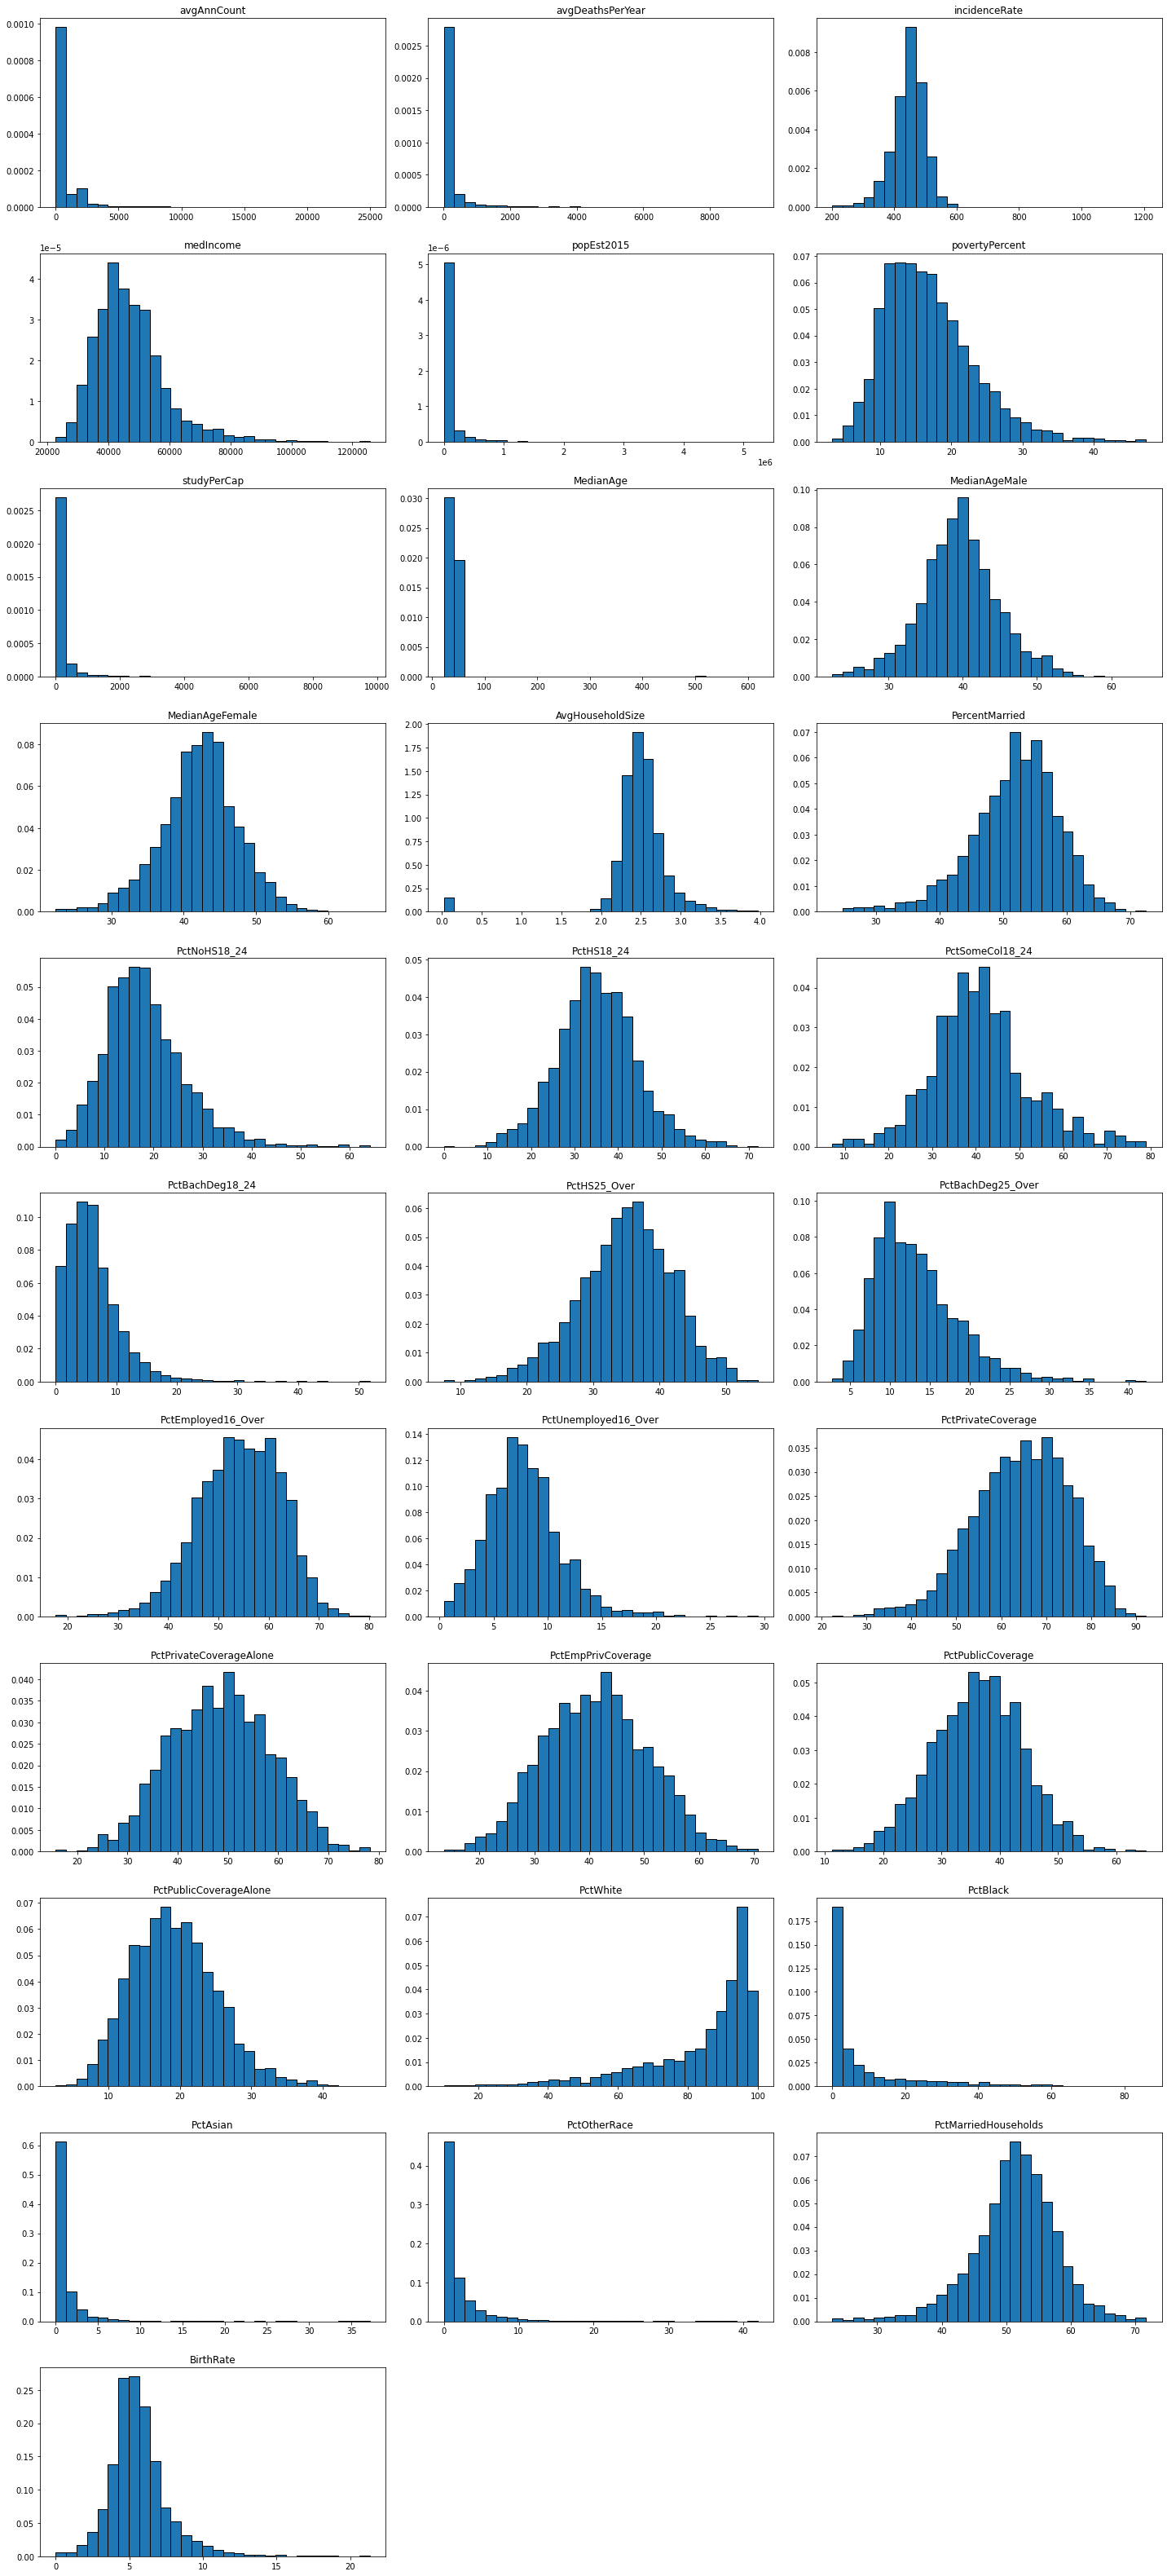

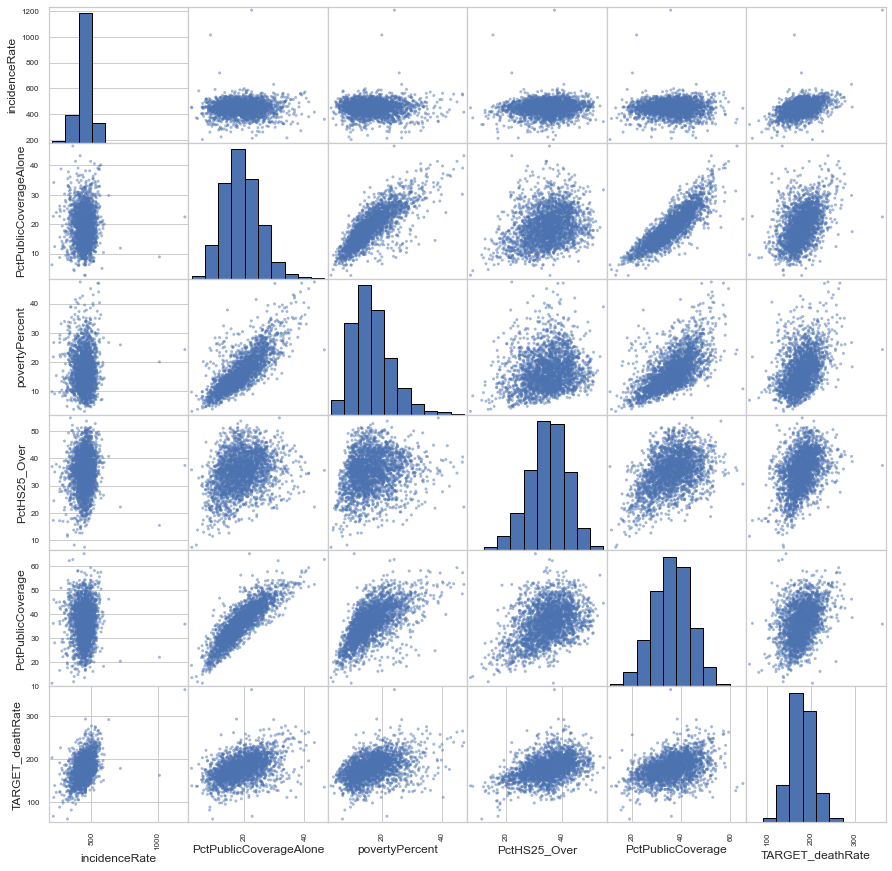

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

training_df = pd.read_csv('Training_data.csv')
targets_df = pd.read_csv('Training_data_targets.csv')

def plot_histograms(dataframe):
    num_plots = len(dataframe.columns)
    cols = 3  
    rows = num_plots // cols + (num_plots % cols > 0)  

    plt.figure(figsize=(20, 4 * rows))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(rows, cols, i + 1)
        # Using Matplotlib for histogram to avoid Seaborn issue
        plt.hist(dataframe[column], bins=30, edgecolor='black', density=True)
        plt.title(column)
        plt.tight_layout()

plot_histograms(training_df)
plt.show() 

# Merge the datasets for correlation analysis
merged_df = pd.concat([training_df, targets_df], axis=1)

# Compute and sort correlations
correlations = merged_df.corr().sort_values(by='TARGET_deathRate', axis=0, ascending=False)

# Extract top five features
top_five_features = correlations.index[1:6]
scatter_data = merged_df[list(top_five_features) + ['TARGET_deathRate']]

sns.set(style="whitegrid")
scatter_matrix(scatter_data, alpha=0.5, figsize=(15, 15), diagonal='hist', hist_kwds={'edgecolor':'black'})
plt.show()


From the Histograms:
Features such as avgAnnCount, avgDeathsPerYear, and popEst2015 are significantly skewed to the right. It shows the presence of counties with very high values compared to the rest, which indicates larger or more densely populated counties.
The MedianAge, MedianAgeMale, and MedianAgeFemale characteristics are more regularly distributed, indicating a consistent distribution across counties.
Economic metrics such as medIncome and povertyPercentage are likewise right-skew, indicating that a smaller number of counties have very high median incomes or poverty rates.

From the Scatter Matrix:
There is a visible positive correlation between PctPublicCoverageAlone and povertyPercent. As the percentage of poverty in a county increases, the population that relies solely on public health coverage also increases. This connection highlights the economic factors that influence access to private healthcare coverage.
Another apparent relationship is between PctHS25_Over and povertyPercent. Counties with a higher percentage of residents with only a high school diploma also tend to have higher poverty rates, which may reflect the broader socio-economic impact of education on financial well-being.

These results emphasise the interaction between socioeconomic position, healthcare coverage, and educational levels across counties. They show that counties with lower median incomes or higher poverty rates rely more on public healthcare and have lower levels of education beyond high school.




*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

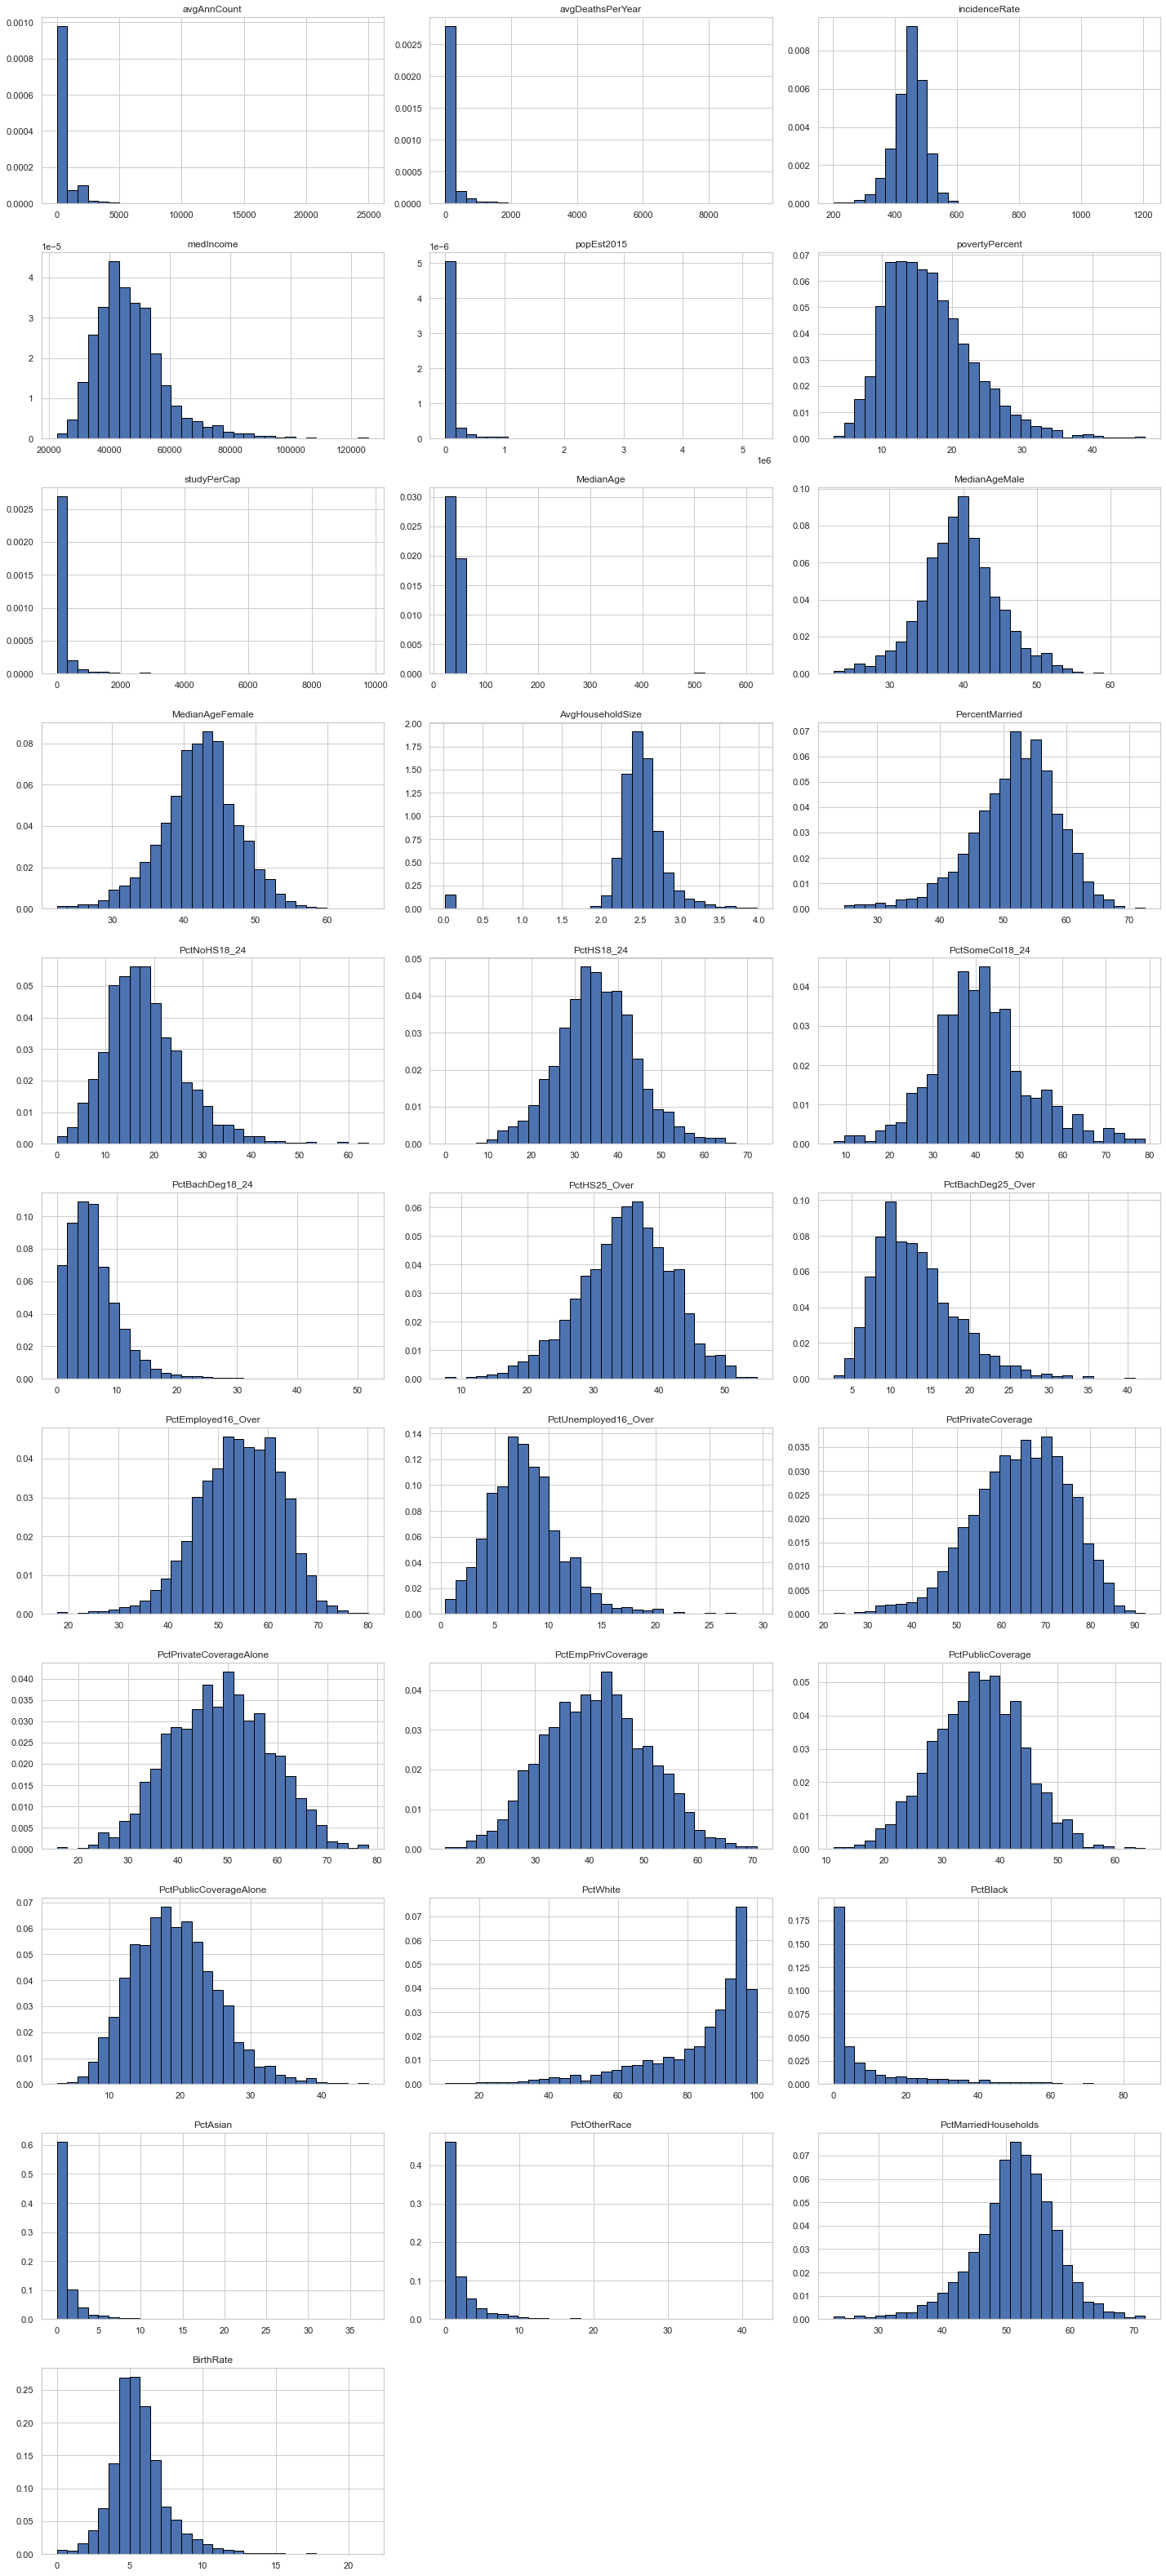

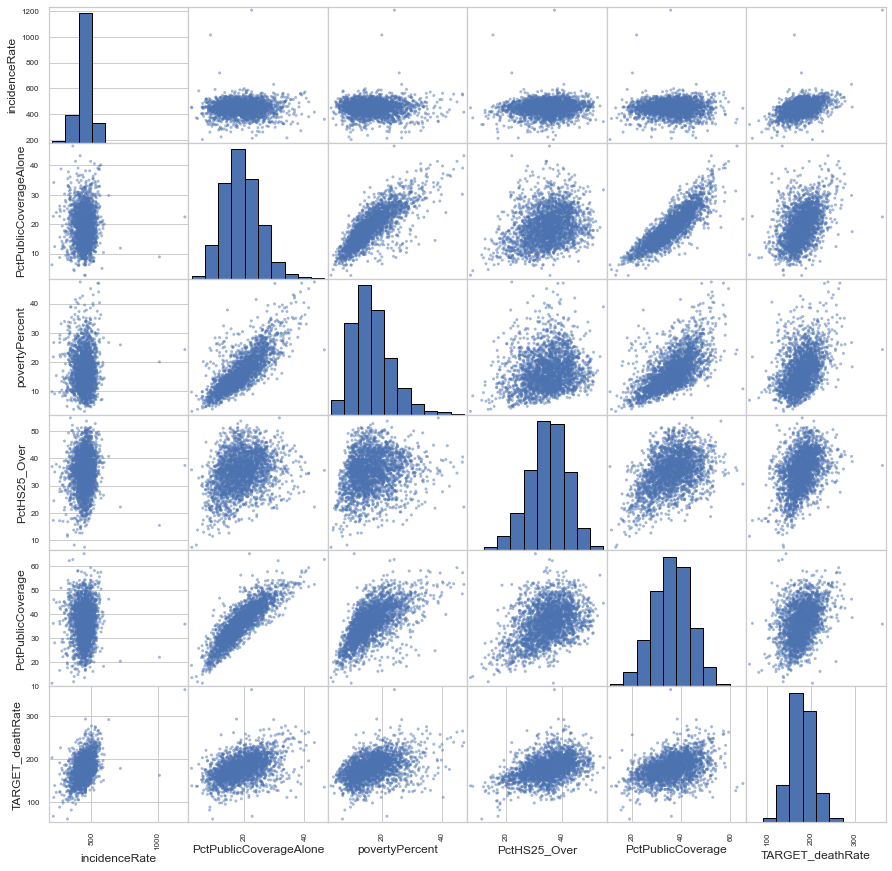

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

training_data_path = 'Training_data.csv'  
targets_data_path = 'Training_data_targets.csv' 

training_df = pd.read_csv(training_data_path)
targets_df = pd.read_csv(targets_data_path)

def plot_histograms(dataframe):
    num_plots = len(dataframe.columns)
    cols = 3 
    rows = num_plots // cols + (num_plots % cols > 0) 

    plt.figure(figsize=(20, 4 * rows))
    for i, column in enumerate(dataframe.columns):
        plt.subplot(rows, cols, i + 1)
        plt.hist(dataframe[column], bins=30, edgecolor='black', density=True)
        plt.title(column)
        plt.tight_layout()

plot_histograms(training_df)
plt.show()

# Calculate the median of MedianAge without errors/outliers
median_age_corrected = training_df[training_df['MedianAge'] <= 100]['MedianAge'].median()

# Replace errors/outliers values with the median
training_df.loc[training_df['MedianAge'] > 100, 'MedianAge'] = median_age_corrected

merged_df = pd.concat([training_df, targets_df], axis=1)
# Compute and sort correlations
correlations = merged_df.corr()['TARGET_deathRate'].sort_values(ascending=False)

top_five_features = correlations.index[1:6]

scatter_data = merged_df[list(top_five_features) + ['TARGET_deathRate']]
sns.set(style="whitegrid")
scatter_matrix(scatter_data, alpha=0.5, figsize=(15, 15), diagonal='hist', hist_kwds={'edgecolor':'black'})
plt.show()


*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

training_data_path = 'Training_data.csv'
targets_data_path = 'Training_data_targets.csv' 

training_df = pd.read_csv(training_data_path)
targets_df = pd.read_csv(targets_data_path)

median_age_corrected = training_df[training_df['MedianAge'] <= 100]['MedianAge'].median()
training_df.loc[training_df['MedianAge'] > 100, 'MedianAge'] = median_age_corrected

merged_df = pd.concat([training_df, targets_df], axis=1)

# Compute and sort correlations with the target variable
correlations = merged_df.corr()['TARGET_deathRate'].sort_values(ascending=False)

specific_features = ['incidenceRate', 'PctBachDeg25_Over', 'PctPublicCoverageAlone', 'medIncome', 'povertyPercent']
correlations_specific = correlations[specific_features]
print("Correlations of specific features with TARGET_deathRate:\n", correlations_specific)


Correlations of specific features with TARGET_deathRate:
 incidenceRate             0.443983
PctBachDeg25_Over        -0.491411
PctPublicCoverageAlone    0.439734
medIncome                -0.416607
povertyPercent            0.413260
Name: TARGET_deathRate, dtype: float64


The provided correlation values between specific features and the target variable TARGET_deathRate (cancer mortality rates) in the dataset are as follows:

1. incidenceRate (Correlation: 0.444):
   - This feature represents the mean per capita (per 100,000) cancer diagnoses.
   - The positive correlation indicates that as the cancer mortality rates tend to increase when incidence rate of cancer diagnoses increases in a county. This suggests a direct relationship between the frequency of cancer cases and mortality rates.

2. PctBachDeg25_Over (Correlation: -0.491):
   - This feature measures the percentage of county residents aged 25 and over who have a bachelor's degree.
   - The negative correlation suggests that counties with a higher percentage of residents holding a bachelor's degree tend to have lower cancer mortality rates. People that have high education may have higher health awareness and healthier lifestyle choices.

3. PctPublicCoverageAlone (Correlation: 0.440):
   - This is the percentage of county residents with public health coverage provided by alone.
   - The positive correlation implies that higher percentages of residents having only public health coverage are associated with higher cancer mortality rates. For socio-economic factors, the residences with public coverage only may be more common in lower-income areas, which could also have other health-related challenges.

4. medIncome (Correlation: -0.417):
   - This feature represents the median income per county.
   - Higher median income levels in a county are correlated to lower cancer mortality rates according to the negative correlation. This could be due to a variety of factors, including better access to healthcare, healthier living conditions, and the ability to afford preventative care in higher-income areas.

5. povertyPercent (Correlation: 0.413):
   - This feature denotes the percentage of the population in poverty within a county.
   - The positive correlation suggests that higher poverty levels are associated with higher cancer mortality rates. This relationship highlights the potential impact of poverty on health outcomes, possibly due to limited access to healthcare, higher stress levels, and other poverty-related factors that can adversely affect health. People in poverty may have a higher rate of cancer mortality.


*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

Negative Correlation between medIncome and povertyPercent:
- This negative correlation is intuitive: When the median income increases, the percentage of the population living in poverty decreases. Higher income levels result in better living conditions, lower poverty rates, and better access to services like healthcare and education.

Negative Correlation between povertyPercent and PctBachDeg25_Over:
- Counties with higher degrees of poverty tend to have fewer people with bachelor's degrees by the age of 25. This relationship highlights the impact of poverty on education. Poverty can be a significant barrier to higher education due to factors like the lack of financial resources. People may need early employment and have limited access to quality primary and secondary education.

Positive Correlation between povertyPercent and PctPublicCoverageAlone:
- This indicates that a larger proportion of the population relies solely on public health coverage in counties with higher poverty rates. This trend underscores lower-income areas' challenges in affording private healthcare coverage and relying on the government for basic healthcare needs.

Relationships Involving PctBachDeg25_Over:
- The negative correlation with PctPublicCoverageAlone and the positive correlation with medIncome reflect broader socio-economic trends. People with higher education are often associated with higher income levels and potentially less reliance on public healthcare coverage. This can lead to better job opportunities, higher earning potential, and better access to resources, including private healthcare.


**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [10]:
 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Loading the training data and targets
training_data_path = 'Training_data.csv'
training_targets_path = 'Training_data_targets.csv' 

training_data = pd.read_csv(training_data_path)
training_targets = pd.read_csv(training_targets_path)

# Splitting the data into features (X) and target (y)
X = training_data
y = training_targets['TARGET_deathRate']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline for data preprocessing
data_preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values with mean
    ('scaler', StandardScaler())                  # Scaling features
])

# Fitting the pipeline on the training data
X_train_preprocessed = data_preprocessing_pipeline.fit_transform(X_train)

# Transforming the test data using the same pipeline
X_test_preprocessed = data_preprocessing_pipeline.transform(X_test)

# Checking the shape of the preprocessed data
print("Training data shape:", X_train_preprocessed.shape)
print("Test data shape:", X_test_preprocessed.shape)


Training data shape: (1950, 31)
Test data shape: (488, 31)


**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train_preprocessed, y_train are already defined as per previous steps

# Ordinary Least Squares (OLS) Model
ols_model = LinearRegression()
ols_model.fit(X_train_preprocessed, y_train)
ols_predictions = ols_model.predict(X_test_preprocessed)
ols_mse = mean_squared_error(y_test, ols_predictions)

# Lasso Regression - Regularisation weight selection
lasso_alphas = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_best_alpha = None
lasso_best_mse = float('inf')

for alpha in lasso_alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_preprocessed, y_train)
    lasso_predictions = lasso_model.predict(X_test_preprocessed)
    lasso_mse = mean_squared_error(y_test, lasso_predictions)

    if lasso_mse < lasso_best_mse:
        lasso_best_mse = lasso_mse
        lasso_best_alpha = alpha

# Using the best alpha for Lasso
lasso_model = Lasso(alpha=lasso_best_alpha)
lasso_model.fit(X_train_preprocessed, y_train)

# Ridge Regression - Regularisation weight selection
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_best_alpha = None
ridge_best_mse = float('inf')

for alpha in ridge_alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_preprocessed, y_train)
    ridge_predictions = ridge_model.predict(X_test_preprocessed)
    ridge_mse = mean_squared_error(y_test, ridge_predictions)

    if ridge_mse < ridge_best_mse:
        ridge_best_mse = ridge_mse
        ridge_best_alpha = alpha

# Using the best alpha for Ridge
ridge_model = Ridge(alpha=ridge_best_alpha)
ridge_model.fit(X_train_preprocessed, y_train)

# Comparing the models
print("OLS MSE:", ols_mse)
print("Lasso MSE (Alpha = {}):".format(lasso_best_alpha), lasso_best_mse)
print("Ridge MSE (Alpha = {}):".format(ridge_best_alpha), ridge_best_mse)

# Get the best model
best_model = 'OLS' if ols_mse < min(lasso_best_mse, ridge_best_mse) else 'Lasso' if lasso_best_mse < ridge_best_mse else 'Ridge'
print("Best Model:", best_model)


OLS MSE: 349.7836064546942
Lasso MSE (Alpha = 0.001): 349.7810455679878
Ridge MSE (Alpha = 0.001): 349.783607673818
Best Model: Lasso


Regularisation Weights Selection:

Lasso: After experimenting with a variety of alpha values (0.001, 0.01, 0.1, 1, 10, 100), the best regularization weight (alpha) for the Lasso regression model was found to be 0.001. The criterion for selection was the mean squared error (MSE), where the alpha value that resulted in the lowest MSE was chosen.
Ridge: Similarly to Lasso for the Ridge regression model, the best regularization weight was found to be 0.001 by the same procedure for the Lasso model.

Model Comparison and Performance:

The OLS model does not involve regularisation, resulted in a MSE of approximately 349.783606.
The Lasso model with alpha = 0.001 achieved a resulted in a lower MSE of approximately 349.7810, indicating a marginal improvement over the OLS model.
The Ridge model with alpha = 0.001 showed resulted in a MSE of approximately 349.783607 which is nearly identical to that of the OLS model.
Given these results, the Lasso regression model with alpha = 0.001 is identified as the best performing model among the all of them. 

Overall Performance:
With the specified regularisation weight, the Lasso model shows a minimal but noteworthy improvement in MSE compared to the OLS and Ridge models. Therefore, the Lasso model is better at generalising the predictions on the test set.
The close performance of all three models indicates that the dataset might not have significant multicollinearity or features contributing to overfitting. 
In conclusion, the Lasso model with a regularisation weight of 0.001 is recommended for this dataset, considering its performance and the potential benefits of regularisation.